## Chronological trend

In [2]:
import pandas as pd
df = pd.read_csv('/Users/caihao/VSCode/AI-drug/data/all_companies.csv')

In [2]:
df.head()

,company_name,category,website,uses_ai_to,allows_researchers_to,founded,headquarters,city,state,country,latitude,longitude,count,funding_stage,funding_amount
0,3BIGS,Aggregate and synthesize information,http://3bigs.com,"Discover relationships between diseases, targe...",Repurpose drugs for new indications,2017,"Suwon, Ch'ungch'ong-namdo, South Korea",Suwon,Ch'ungch'ong-namdo,South Korea,37.263332,127.028747,1,NaN,NaN
1,Amplion,Aggregate and synthesize information,https://www.amplion.com,Synthesize biomedical knowledge and biomarker ...,"Ensure an effective mix of biomarkers, establi...",2013,"Bend, Oregon, United States",Bend,Oregon,United States,44.058173,-121.315310,1,A,2.6
2,BioSymetrics,Aggregate and synthesize information,http://www.biosymetrics.com,"Process raw phenotypic, imaging, drug, and gen...",Integrate rapid analytics and machine learning...,2015,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,NaN,NaN
3,OneThree Biotech,Aggregate and synthesize information,https://onethree.bio/,Integrate and analyze data from over 30 types ...,Generate new insights across the drug developm...,2018,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,Seed,2.5
4,Owkin,Aggregate and synthesize information,http://www.owkin.com,"Build intelligence from distributed datasets, ...",Overcome the problem of data-sharing in health...,2016,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,A,56.1


In [3]:
# import numpy as np
# df = df.replace('na', np.nan)
# df.to_csv('/Users/caihao/VSCode/AI-drug/all_companies.csv', index=False)

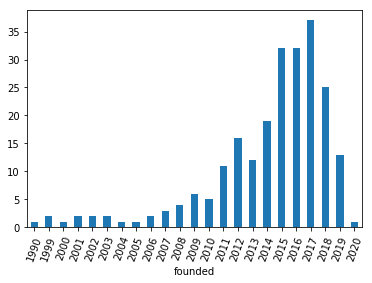

In [4]:
# Number of companies founded in each year.
import matplotlib.pyplot as plt
df.groupby('founded').size().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

## R&D and clinical phases

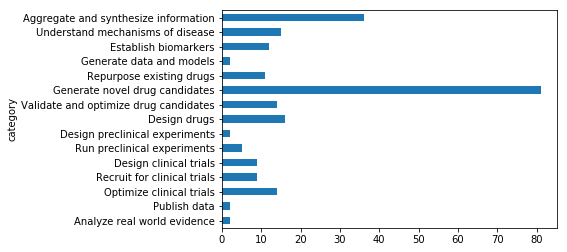

In [5]:
# Number of companies.
phases = ['Aggregate and synthesize information', 'Understand mechanisms of disease', 'Establish biomarkers', 'Generate data and models', 'Repurpose existing drugs', 'Generate novel drug candidates', 'Validate and optimize drug candidates', 'Design drugs', 'Design preclinical experiments', 'Run preclinical experiments', 'Design clinical trials', 'Recruit for clinical trials', 'Optimize clinical trials', 'Publish data', 'Analyze real world evidence']
df['category'] = pd.Categorical(df['category'], phases)
df.groupby('category').size().sort_index(ascending=False).plot(kind='barh')
plt.show()

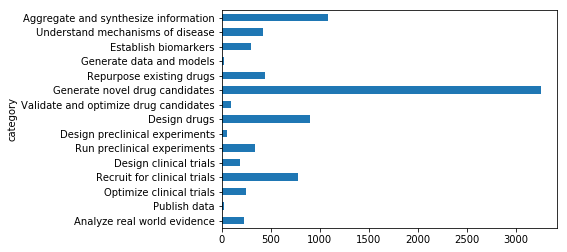

In [6]:
# Funding amount.
df.groupby('category')['funding_amount'].sum().sort_index(ascending=False).plot(kind='barh')
plt.show()

## Geographical distribution

In [7]:
# Number of companies.
import plotly.express as px
plot_df = df.groupby('country').size().sort_values(ascending=True).reset_index().rename(columns={0:'count'})
fig = px.pie(plot_df, values='count', names='country', title='AI-drug startups in the world')
fig.update_traces(textinfo='value')
fig.show()

In [8]:
# Funding amount.
plot_df = df.groupby('country')['funding_amount'].sum().sort_values(ascending=True).reset_index()
fig = px.pie(plot_df, values='funding_amount', names='country', title='AI-drug startups in the world')
fig.update_traces(textinfo='value')
fig.show()

## Venture stages

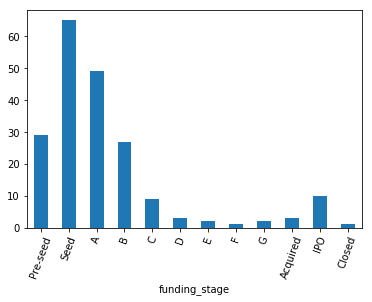

In [9]:
stages = ['Pre-seed', 'Seed', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Acquired', 'IPO', 'Closed']
df['funding_stage'] = pd.Categorical(df['funding_stage'], stages)
df.groupby('funding_stage').size().sort_index(ascending=True).plot(kind='bar')
plt.xticks(rotation=70)
plt.show()